#**Student Performance Analysis using Machine Learning Regression Algorithm in Python**

###**Project Overview :**

### This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. This project focuses on evaluating student's capabilities in various subjects using a **Regression** task. By performing this task, knowledge is extracted that describes student's performance in the end-semester examination. This helps in identifying dropouts and students who require special attention, enabling teachers to provide appropriate advising and counseling.

###**Dataset Imformation :**
###1) gender: sex of students -> (Male/female)
###2) race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
###3) parental level of education: parents’ final education ->(bachelor’s degree, some college, master’s degree, associate’s degree).
###4) lunch: having lunch before test (standard or free/reduced)
###5) test preparation course: complete or not complete before test.
###6) math score
###7) reading score
### 8) writing score

###**Import Liabraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

###**Data Collection :**

In [34]:
df = pd.read_csv('/content/StudentsPerformance (1).csv')


###**Understanding the data :**

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [36]:
df.shape

(1000, 8)

### The dataset consists of 8 columns and 1000 rows.

***Get information about our dataset like total number Rows, total number of Columns,Datatypes of each column and memory requirement***


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### We can see that the dataset contains 3 columns with int values and 5 with categorical values.

#Display top 5 rows of dataset

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Display last 5 rows of dataset

In [39]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# Check Stastistics of the dataset

In [40]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


###The numerical data shown above shows that all means are fairly similar to one another, falling between 66 and 68.05.
###The range of all standard deviations, between 14.6 and 15.19, is also narrow.
###While there is a minimum score of 0 for math, the minimums for writing and reading are substantially higher at 10 and 17, respectively.

#**Data Preprocessing :**

# Check null values in dataset

In [41]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### There is no missing value in the dataset.

# Check Duplicate Values

In [42]:
df.duplicated().sum()

0

### There is no duplicate value in the dataset.


#Check the number of unique values in each column

In [43]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# **Exploratory Data Analysis**

### Now we define the numerical and categorical columns :

In [44]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "object"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]

print("We have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [45]:
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


#**Data Visualization**

###**Univariate Analysis**

**Count plot**

<Axes: xlabel='gender', ylabel='count'>

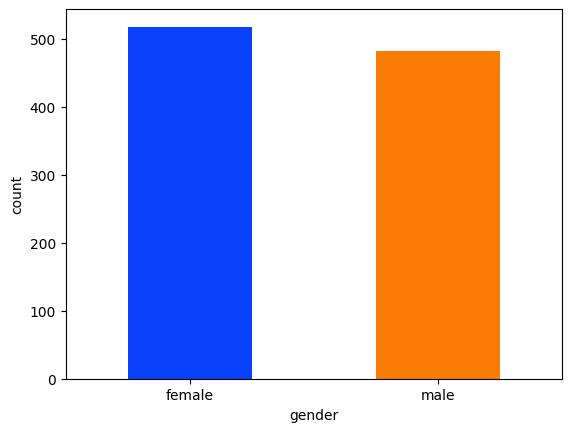

In [46]:
sns.countplot(x=df['gender'], data= df,palette='bright',saturation =0.95,width=0.5)


###Gender has balanced data with female students are 518 and male students are 482.

**Count plot**

<Axes: xlabel='race/ethnicity', ylabel='count'>

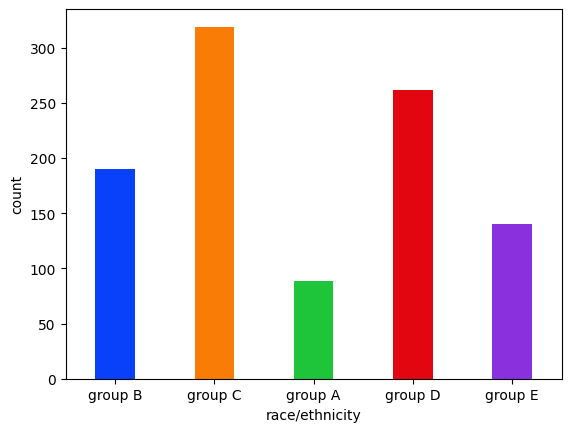

In [47]:
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', width=0.4, saturation=0.95)


#####We can see that most of students belonging from groupC.
#####Lowest number of students belong to group A.

**Histogram**

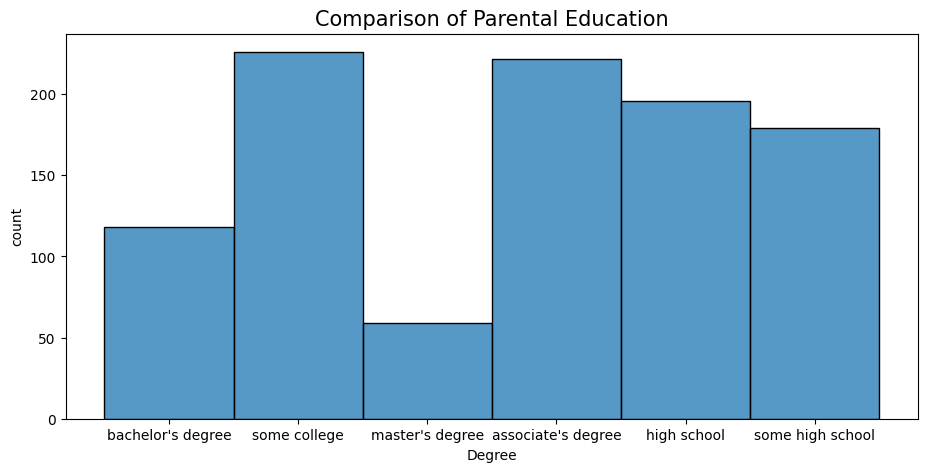

In [48]:
plt.figure(figsize=(11,5))
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 15)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

###Largest number of parents are from college.

**Histogram**

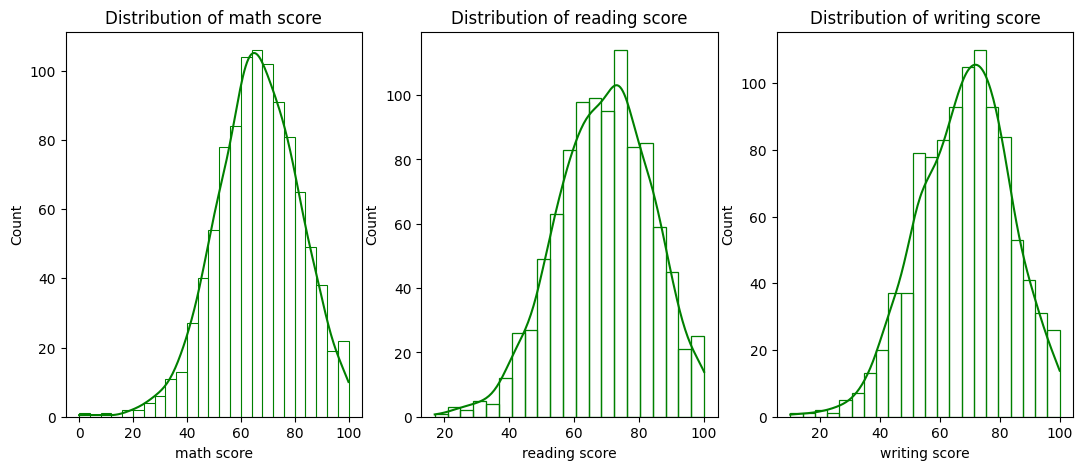

In [49]:
fig, axes = plt.subplots(ncols=3, figsize=(13,5))
for index, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, color='green', fill=False, ax=axes[index]).set(title='Distribution of '+col)
plt.show()

###From the above 3 plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

#**Bivariate Analysis**

**Bar plot**

<Figure size 700x500 with 0 Axes>

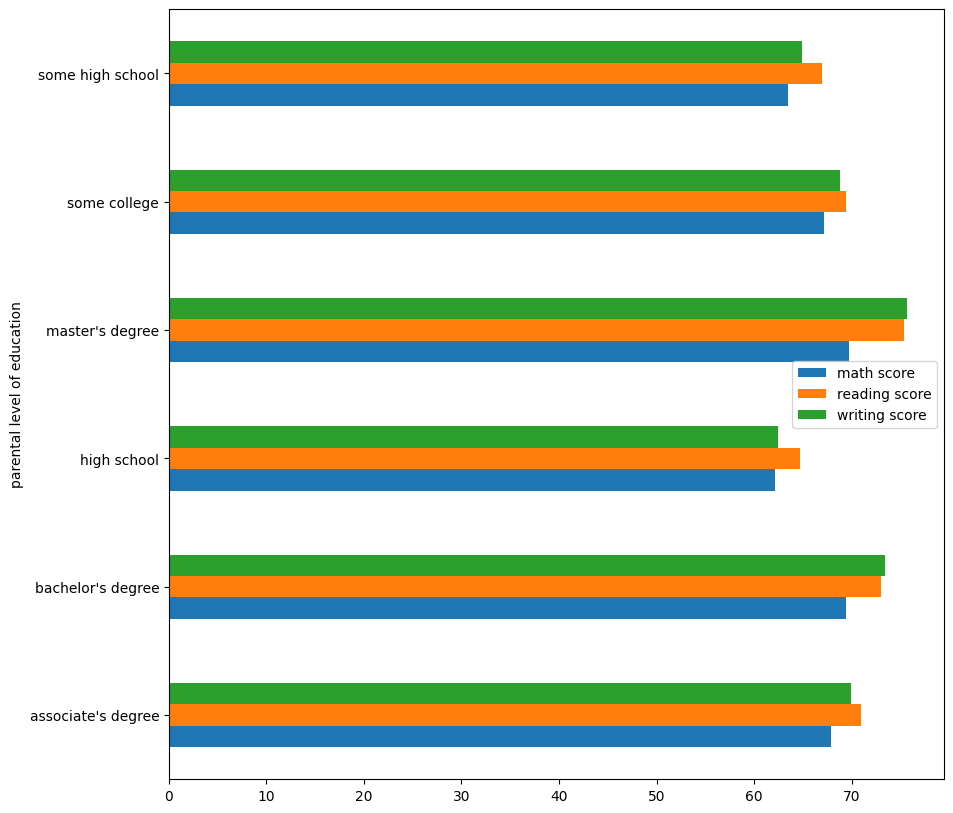

In [50]:
plt.figure(figsize=(7,5))
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10),legend='best')
plt.show()

####The score of student whose parents possess master and bachelor level education are higher than others.

**Scatter plot**

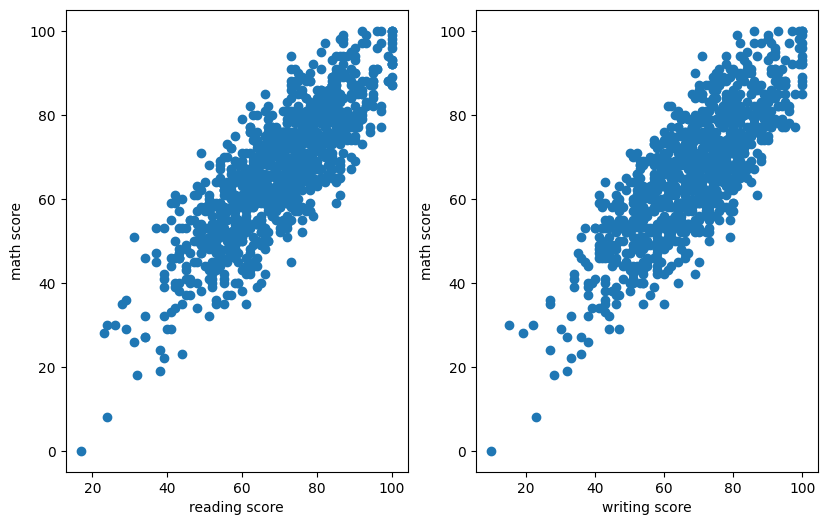

In [51]:
x_columns = numerical_features[1:3]
y_column = numerical_features[0]

plt.figure(figsize=(15,6))
for i in range(len(x_columns)) :
    plt.subplot(1,3,i+1)
    plt.scatter(df[x_columns[i]], df[y_column])
    plt.xlabel(x_columns[i])
    plt.ylabel(y_column)
plt.show()

### We can see that math score column has positive linear relationship with reading score and writing score.

**Pie Chart**

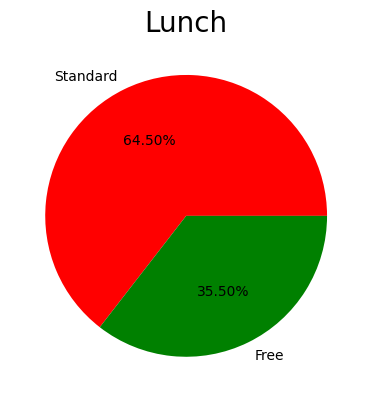

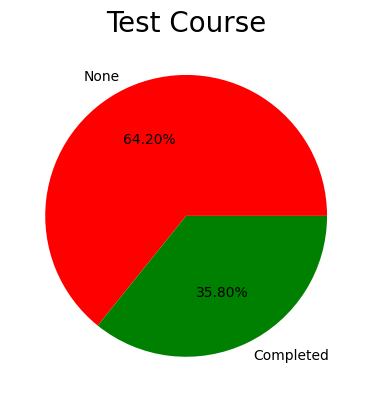

In [52]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.show()

###The number of students who have standard lunch is greater.
###The number of students who have not enrolled in any test preparation course is greater.


#**Multivariate Analysis**

**Heatmap**

<Axes: >

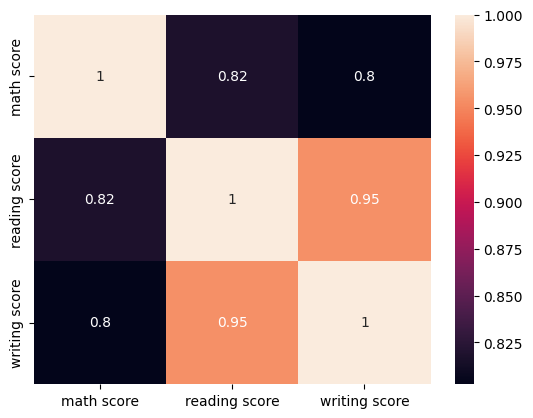

In [54]:
sns.heatmap(df[numerical_features ].corr(), annot=True)

###There is strong relationship between math score, reading score, writing score

#Check Outliers

<Axes: >

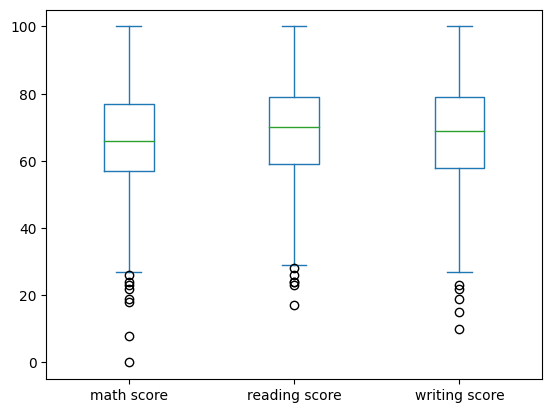

In [10]:
df.plot(kind='box',layout=(2,3))

#Remove Outliers

In [11]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_bound}")
print(f"Upper Whisker = {upper_bound}")

Q1 = 57.0
Q3 = 77.0
IQR = 20.0
Lower Whisker = 27.0
Upper Whisker = 107.0


In [12]:
df['math score'] = df['math score'].clip(lower =lower_bound, upper =upper_bound)

<Axes: xlabel='math score'>

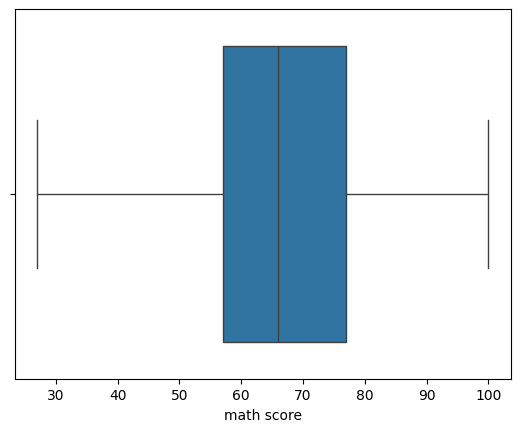

In [13]:
sns.boxplot(data=df['math score'], orient='h')

In [14]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_bound}")
print(f"Upper Whisker = {upper_bound}")

Q1 = 59.0
Q3 = 79.0
IQR = 20.0
Lower Whisker = 29.0
Upper Whisker = 109.0


In [15]:
df['reading score'] = df['reading score'].clip(lower =lower_bound, upper =upper_bound)

<Axes: xlabel='reading score'>

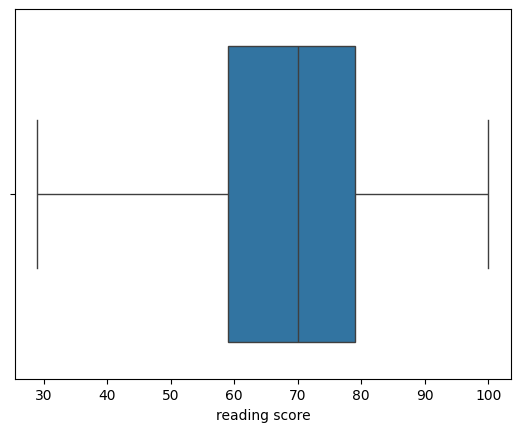

In [16]:
sns.boxplot(data=df['reading score'], orient='h')

In [17]:
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"Lower Whisker = {lower_bound}")
print(f"Upper Whisker = {upper_bound}")

Q1 = 57.75
Q3 = 79.0
IQR = 21.25
Lower Whisker = 25.875
Upper Whisker = 110.875


In [18]:
df['writing score'] = df['writing score'].clip(lower =lower_bound, upper =upper_bound)

<Axes: xlabel='writing score'>

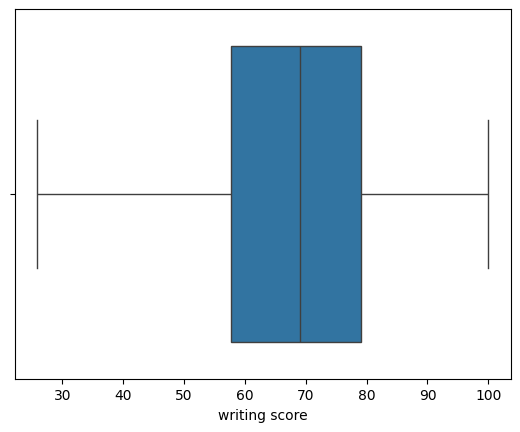

In [19]:
sns.boxplot(data=df['writing score'], orient='h')

#**Model Development**

#**Feature Selection**

#Spliting the X and Y variables

In [20]:
X = df.drop(columns="math score",axis=1)
y = df["math score"]

#**Feature Engineering**

In [21]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer( [ ("OneHotEncoder", oh_transformer, cat_features), ("StandardScaler", numeric_transformer, num_features), ] )
X = preprocessor.fit_transform(X)

#Separate Dataset into Train and Test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#**Evaluate Model**

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def regression_metrics(model, y_test, y_pred):
    print("\t\t", model)
    print("R2 score :", r2_score(y_test,y_pred))
    print("Mean absolute error :", mean_absolute_error(y_test,y_pred))
    print("Mean squared error :", mean_squared_error(y_test,y_pred))
    print("Root Mean squared error :", mean_squared_error(y_test,y_pred, squared=False))

In [24]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
regression_metrics("Linear Regression", y_test, y_pred1)

		 Linear Regression
R2 score : 0.8707186961174458
Mean absolute error : 4.225373836763914
Mean squared error : 29.247538851664643
Root Mean squared error : 5.408099375165423


In [25]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor()
reg2.fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
regression_metrics("Decision Tree Regressor", y_test, y_pred2)

		 Decision Tree Regressor
R2 score : 0.7435097258110626
Mean absolute error : 5.9375
Mean squared error : 58.02625
Root Mean squared error : 7.6174963078428855


In [26]:
from sklearn.ensemble import RandomForestRegressor

reg3 = RandomForestRegressor(n_estimators=200)
reg3.fit(X_train,y_train)
y_pred3 = reg3.predict(X_test)
regression_metrics("Random Forest Regressor", y_test, y_pred3)

		 Random Forest Regressor
R2 score : 0.8470919329978195
Mean absolute error : 4.561858333333333
Mean squared error : 34.59266340972223
Root Mean squared error : 5.881552805996239


In [27]:
from sklearn.neighbors import KNeighborsRegressor

error = []
# Calculating MAE error for K values between 1 and 20
k_neighbors = range(1,21)
for i in k_neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

#K- Nearest Neighbors

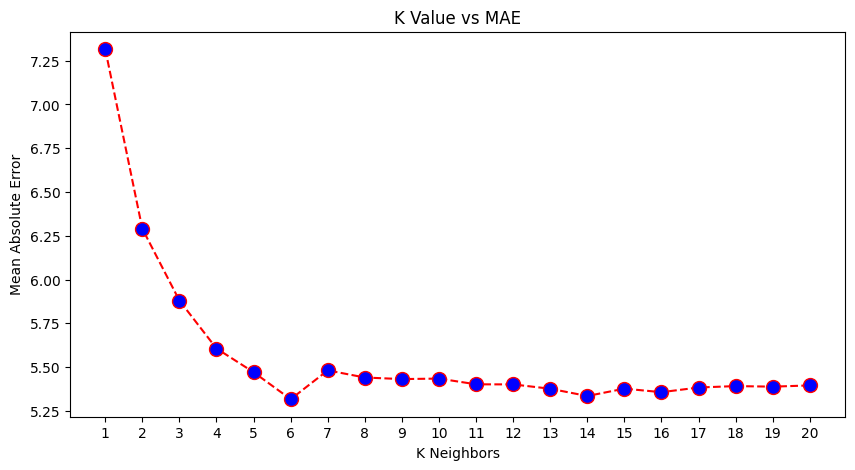

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(k_neighbors, error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xticks(k_neighbors)
plt.title('K Value vs MAE')
plt.xlabel('K Neighbors')
plt.ylabel('Mean Absolute Error')
plt.show()

k=6 is the optimal value as MAE is lowest when k=6.

In [29]:
reg4 = KNeighborsRegressor(n_neighbors=6)
reg4.fit(X_train,y_train)
y_pred4 = reg4.predict(X_test)
regression_metrics("K Nearest Neighbors Regressor", y_test, y_pred4)

		 K Nearest Neighbors Regressor
R2 score : 0.7939625314692322
Mean absolute error : 5.316666666666667
Mean squared error : 46.61222222222223
Root Mean squared error : 6.827314422393496


###If we choose Linear regression as the final model because that model got r2 score is 87.07 on training set.

#**Model Selection**

###In linear regression, we got 87.07 accuracy in all of the regression models that’s why we have choosen model.

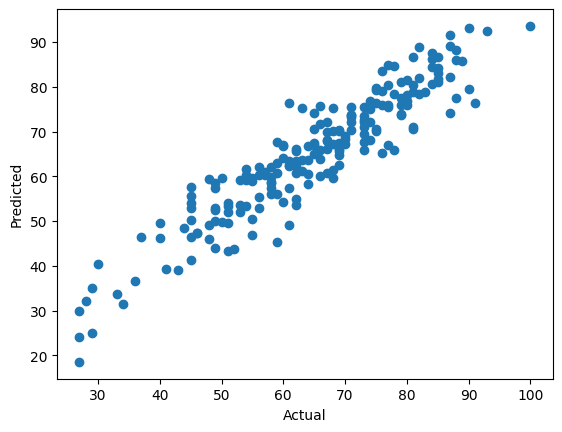

In [30]:
plt.scatter(y_test,y_pred1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

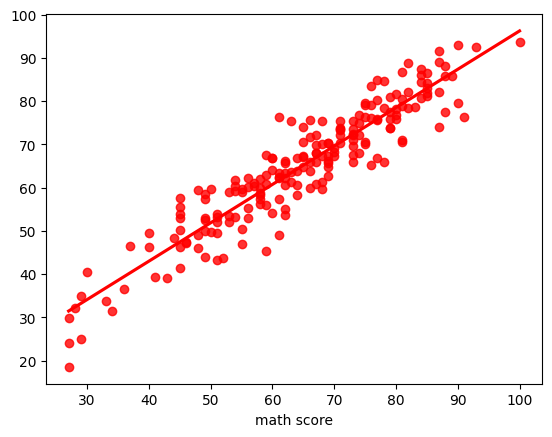

In [31]:
sns.regplot(x=y_test, y=y_pred1 ,ci=None, color ='red')

#Difference Between Actual and Predicted Values


In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred1,'Difference':y_test-y_pred1})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.321201,14.678799
737,53,59.100841,-6.100841
740,80,76.871834,3.128166
660,74,76.738575,-2.738575
411,84,87.512723,-3.512723
...,...,...,...
408,52,43.673027,8.326973
332,62,62.208091,-0.208091
208,74,68.048711,5.951289
613,65,67.034529,-2.034529
